## Assignment 1: Analyzing Dublin Bus Data

### 1. Loading the Data

In [1]:
# Load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data

siri = pd.read_csv("SiriLog.csv")

siri.head()

,Time,LineID,JourneyPattern,VehicleJID,Operator,Congestion,Lon,Lat,Delay,VehicleID,StopID,AtStop
0,1411686000,65B,065B1001,7251,RD,0,-6.266066,53.338269,-739,38004,1354,0
1,1411686000,13,00131002,1809,HN,0,-6.266332,53.408386,1127,33342,323,0
2,1411686000,7,00070004,4235,D1,0,-6.130316,53.254202,-420,44016,3219,0
3,1411686000,25,025B0001,5757,CD,0,-6.446961,53.344495,143,33608,3370,0
4,1411686001,27,077A0001,2602,RD,0,-6.341833,53.289558,45,33520,2596,0


### 2. Analyzing the Data

In [3]:
# Check the types of each column

siri.dtypes

Time                int64
LineID             object
JourneyPattern     object
VehicleJID          int64
Operator           object
Congestion          int64
Lon               float64
Lat               float64
Delay               int64
VehicleID           int64
StopID              int64
AtStop              int64
dtype: object

In [4]:
# Change some of the columns to categorical type
# since they are unique identifiers or indicators

siri.LineID = siri.LineID.astype('category')
siri.JourneyPattern = siri.JourneyPattern.astype('category')
siri.VehicleJID = siri.VehicleJID.astype('category')
siri.Operator = siri.Operator.astype('category')
siri.VehicleID = siri.VehicleID.astype('category')
siri.StopID = siri.StopID.astype('category')

In [5]:
# Check data types after conversion

siri.dtypes

Time                 int64
LineID            category
JourneyPattern    category
VehicleJID        category
Operator          category
Congestion           int64
Lon                float64
Lat                float64
Delay                int64
VehicleID         category
StopID            category
AtStop               int64
dtype: object

In [6]:
# Check for missing values

siri.isnull().sum()

Time              0
LineID            0
JourneyPattern    0
VehicleJID        0
Operator          0
Congestion        0
Lon               0
Lat               0
Delay             0
VehicleID         0
StopID            0
AtStop            0
dtype: int64

#### After analyzing the dataset, we can see that the _Time, Congestion, Lon, Lat, Delay, and AtStop_ columns are numeric, while the _LineID, JourneyPattern, VehicleJID, Operator, VehicleID, and StopID_ indicator are all categorical.

### 3. Exploring the Data

In [7]:
# Check summary stats for numeric columns

siri.describe()

,Time,Congestion,Lon,Lat,Delay,AtStop
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.411733e+09,6.713874e-03,-6.270000e+00,5.334311e+01,1.513641e+02,2.197182e-01
std,1.397623e+04,8.166274e-02,7.979334e-02,5.285900e-02,6.200250e+02,4.140559e-01
min,1.411686e+09,0.000000e+00,-6.614652e+00,5.307042e+01,-1.420900e+04,0.000000e+00
25%,1.411720e+09,0.000000e+00,-6.304491e+00,5.332053e+01,-5.900000e+01,0.000000e+00
50%,1.411733e+09,0.000000e+00,-6.261588e+00,5.334552e+01,6.400000e+01,0.000000e+00
75%,1.411745e+09,0.000000e+00,-6.233367e+00,5.336943e+01,2.950000e+02,0.000000e+00
max,1.411756e+09,1.000000e+00,-6.053133e+00,5.360652e+01,1.172300e+04,1.000000e+00


#### The ranges for numeric attributes are as follows:
- Time: [1.411686e+09, 1.411756e+09]
- Congestion: [0, 1]
- Lon: [-6.614652e+00, -6.053133e+00]
- Lat: [5.307042e+01, 5.360652e+01]
- Delay: [-1.420900e+04, 1.172300e+04]
- AtStop: [0, 1]

#### Mean and Standard Deviation of each numeric predictor:
- Time: mean = 1.411733e+09, std = 1.397623e+04
- Congestion: mean = 6.713874e-03, std = 8.166274e-02
- Lon: mean = -6.270000e+00, std = 7.979334e-02
- Lat: mean = 5.334311e+01, std = 5.285900e-02
- Delay: mean = 1.513641e+02, std = 6.200250e+02
- AtStop: mean = 2.197182e-01, std = 4.140559e-01

### 4. Manipulating the Data

In [8]:
# Remove rows 1000 to 8500

siri_clean = siri.drop(siri.index[999:8500])
siri_clean.iloc[998:1000, :]

,Time,LineID,JourneyPattern,VehicleJID,Operator,Congestion,Lon,Lat,Delay,VehicleID,StopID,AtStop
998,1411686187,27,00271003,2403,CF,0,-6.257911,53.347840,-139,33239,298,0
8500,1411708630,14,00141001,3590,D1,0,-6.245817,53.292417,0,33465,6041,1


In [9]:
siri_clean.describe()

,Time,Congestion,Lon,Lat,Delay,AtStop
count,1.041074e+06,1.041074e+06,1.041074e+06,1.041074e+06,1.041074e+06,1.041074e+06
mean,1.411733e+09,6.762247e-03,-6.269921e+00,5.334317e+01,1.526865e+02,2.193600e-01
std,1.368251e+04,8.195441e-02,7.956155e-02,5.267330e-02,6.214491e+02,4.138132e-01
min,1.411686e+09,0.000000e+00,-6.614652e+00,5.307042e+01,-1.420900e+04,0.000000e+00
25%,1.411720e+09,0.000000e+00,-6.304279e+00,5.332064e+01,-5.800000e+01,0.000000e+00
50%,1.411733e+09,0.000000e+00,-6.261579e+00,5.334552e+01,6.500000e+01,0.000000e+00
75%,1.411745e+09,0.000000e+00,-6.233417e+00,5.336941e+01,2.970000e+02,0.000000e+00
max,1.411756e+09,1.000000e+00,-6.053133e+00,5.360652e+01,1.172300e+04,1.000000e+00


#### The ranges for numeric attributes are as follows:
- Time: [1.411686e+09, 1.411756e+09]
- Congestion: [0, 1]
- Lon: [-6.614652e+00, -6.053133e+00]
- Lat: [5.307042e+01, 5.360652e+01]
- Delay: [-1.420900e+04, 1.172300e+04]
- AtStop: [0, 1]

#### Mean and Standard Deviation of each numeric predictor:
- Time: mean = 1.411733e+09, std = 1.368251e+04
- Congestion: mean = 6.762247e-03, std = 8.195441e-02
- Lon: mean = -6.269921e+00, std = 7.956155e-02
- Lat: mean = 5.334317e+01, std = 5.267330e-02
- Delay: mean = 1.526865e+02, std = 6.214491e+02
- AtStop: mean = 2.193600e-01, std = 4.138132e-01

In [10]:
# Check for unique operators

op_list = siri_clean['Operator'].unique().tolist()

op_list

['RD', 'HN', 'D1', 'CD', 'PO', 'SL', 'CF', 'D2']

In [11]:
# Calculate mean delay for one of the operators

rd_op = siri_clean[siri_clean['Operator'] == 'RD']

rd_mean_delay = rd_op['Delay'].mean()

rd_mean_delay

167.981282079455

#### The mean delay for operator "RD" is 167.981282079455.

### 5. Plotting the Data

Text(0.5, 0.98, 'Delay Time By Operator')

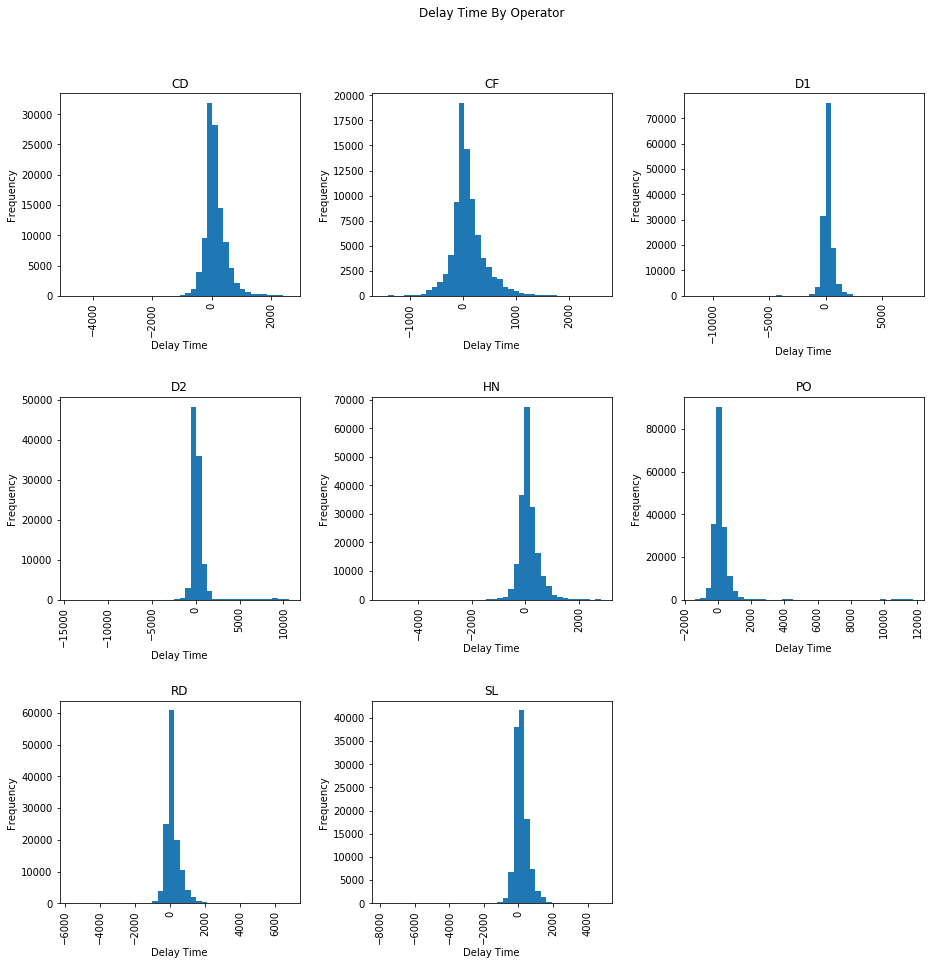

In [31]:
siri_plot = siri.hist(by='Operator', column='Delay', bins = 40, figsize = (15, 15))

for x in siri_plot.flatten():
    x.set_xlabel('Delay Time')
    x.set_ylabel('Frequency')

plt.suptitle('Delay Time By Operator')

#### From the multiple histograms we can see that all operators have delay distributions centered around zero while following a mostly uniform distribution. Although we can see some outliers within these graphs, this still shows that most of the time the buses arrives on schedule and do not deviate too much. The outliers could be due to uncommon circumstances.

### 6. Wrangling the Data

In [27]:
# Check the amount of unique vehicle journey ID's

vjid = siri['VehicleJID'].unique().tolist()
len(vjid)

5970

In [28]:
# Randomly select one of the unique JID's to see what the content looks like

siri[(siri['VehicleJID'] == 7)]

,Time,LineID,JourneyPattern,VehicleJID,Operator,Congestion,Lon,Lat,Delay,VehicleID,StopID,AtStop
4641,1411707602,41,00410001,7,SL,0,-6.215884,53.454279,-415,33420,6054,0
4702,1411707621,41,00410001,7,SL,0,-6.218202,53.454707,-442,33420,4330,0
4893,1411707693,41,00410001,7,SL,0,-6.220946,53.457446,-442,33420,3679,0
4952,1411707713,41,00410001,7,SL,0,-6.220142,53.458824,-442,33420,3679,0
5003,1411707733,41,00410001,7,SL,0,-6.220099,53.458891,-442,33420,3679,1
5065,1411707753,41,00410001,7,SL,0,-6.220099,53.458891,-418,33420,3679,1
5120,1411707773,41,00410001,7,SL,0,-6.220480,53.459299,-418,33420,5075,0
5181,1411707793,41,00410001,7,SL,0,-6.224212,53.459999,-418,33420,5076,0
5242,1411707813,41,00410001,7,SL,0,-6.228266,53.461208,-433,33420,5076,0
5304,1411707835,41,00410001,7,SL,0,-6.231204,53.462118,-433,33420,3682,1


In [29]:
# Create new dataset organized by journey ID

siri_new = siri.groupby("VehicleJID").agg(
    max_time = pd.NamedAgg(column='Time', aggfunc='max'),
    min_time = pd.NamedAgg(column='Time', aggfunc='min'),
#   lineID = pd.NamedAgg(column='LineID', aggfunc=np.unique),
    journey_pattern = pd.NamedAgg(column='JourneyPattern', aggfunc=np.unique),
    congestion_prob = pd.NamedAgg(column='Congestion', aggfunc=np.mean),
    mean_delay = pd.NamedAgg(column='Delay', aggfunc=np.mean),
    atstop_prob = pd.NamedAgg(column='AtStop', aggfunc=np.mean),
)

siri_new['journey_duration'] = siri_new['max_time'] - siri_new['min_time']

siri_new.head()

,max_time,min_time,journey_pattern,congestion_prob,mean_delay,atstop_prob,journey_duration
VehicleJID,,,,,,,
1,1411747735,1411744132,[033A1002],0.000000,460.085890,0.269939,3603
2,1411751274,1411747850,[033A0001],0.000000,1121.917722,0.126582,3424
4,1411710780,1411707605,[00411001],0.000000,-183.556391,0.263158,3175
5,1411714552,1411710838,[041C0001],0.000000,-140.125874,0.167832,3714
6,1411719042,1411714680,[00411002],0.032258,132.688172,0.209677,4362


In [30]:
siri_new.isnull().sum()


max_time            0
min_time            0
journey_pattern     0
congestion_prob     0
mean_delay          0
atstop_prob         0
journey_duration    0
dtype: int64

### 7. Correlation and Plots

In [32]:
# Pearson correlation coefficients

siri_new.corr()

,max_time,min_time,congestion_prob,mean_delay,atstop_prob,journey_duration
max_time,1.000000,0.992292,-0.072025,0.135392,0.075045,0.112009
min_time,0.992292,1.000000,-0.071443,0.122806,0.076419,-0.011993
congestion_prob,-0.072025,-0.071443,1.000000,0.017731,-0.120925,-0.008284
mean_delay,0.135392,0.122806,0.017731,1.000000,-0.060490,0.107723
atstop_prob,0.075045,0.076419,-0.120925,-0.060490,1.000000,-0.007250
journey_duration,0.112009,-0.011993,-0.008284,0.107723,-0.007250,1.000000


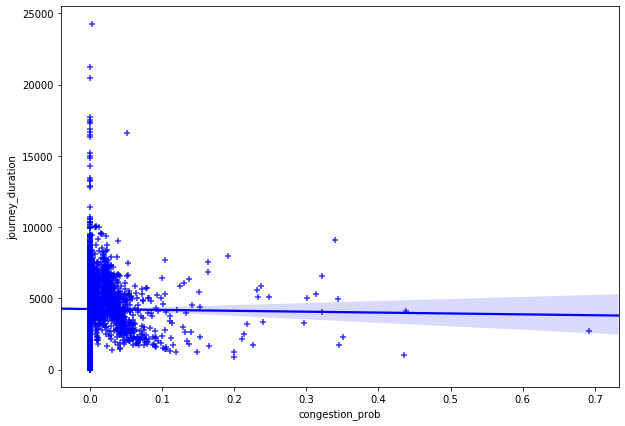

In [35]:
import seaborn as sns

# Test with single plot

fig = plt.figure(figsize=(10, 7))
sns.regplot(x="congestion_prob", y="journey_duration", data=siri_new, color='blue', marker='+')

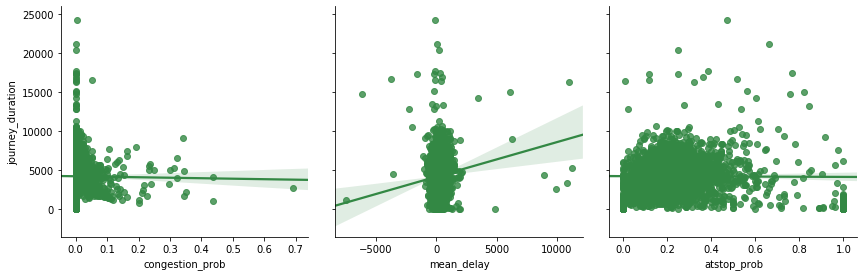

In [47]:
# Linear Regression plots

mult_corr_plot = sns.PairGrid(siri_new, y_vars=["journey_duration"], x_vars=["congestion_prob", "mean_delay", "atstop_prob"], height=4)
mult_corr_plot.map(sns.regplot, color="#338844")

#### From the regression plots above we can see that there seems to be a strong positive correlation between mean delay and total journey duration, which makes sense because delays would in general prolong the journey by a significant amount of time. Although the plot seems to suggest this, the Pearson correlation coefficient between mean delay and journey duration is only about 0.108. The probabilities of congestion and stopping do not seem to be strongly correlated to journey duration.

#### However, more in-depth statistical analysis is necessary to obtain more information.